In [2]:
import numpy as np
import pandas as pd
import src.scrubbington as scrub
import src.evaluationton as evalu


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

/Users/vineetkuroodi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/vineetkuroodi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Read In and Clean Data

In [64]:
df_orig = pd.read_json('./data/data.json')

In [65]:
feature_list = ['channels', 'fb_published', 'has_analytics', 
                'has_logo', 'num_order', 'num_payouts', 
                'sale_duration2', 'show_map', 'user_age', 'user_type', 
                'body_length', 'org_name_bool', 'user_min_delta']
                #'event_min_delta']

In [66]:
df, y, X = scrub.scrub_everything(df_orig, feature_list)

In [67]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_name,venue_state,fraud_no_fraud,org_name_bool,user_delta,user_hour_delta,user_min_delta,event_delta,event_hour_delta,event_min_delta
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,...,INK Nightclub - South Beach,FL,True,False,36 days 04:15:56,868.265556,5.209593e+04,4 days 06:48:52,102.814444,6168.866667
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,...,"The Charleston, SC area",SC,False,False,149 days 04:31:34,3580.526111,2.148316e+05,0 days 00:10:25,0.173611,10.416667
2,premium,2011-01-28 00:00:00,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,2010-11-30 04:22:36,...,Los Angeles County Office of Education,CA,False,False,214 days 11:39:28,5147.657778,3.088595e+05,0 days 00:15:52,0.264444,15.866667
3,premium,2014-01-06 00:00:00,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,2013-02-12 15:06:10,...,None,None,False,True,889 days 00:31:08,21336.518889,1.280191e+06,0 days 00:31:16,0.521111,31.266667
4,premium,2011-02-17 00:00:00,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,2010-12-10 15:24:26,...,Fish & Richardson,MA,False,False,34 days 20:16:41,836.278056,5.017668e+04,0 days 00:05:00,0.083333,5.000000


### Test Train Split

In [68]:
#Note: default split perecentage is 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [69]:
X_train_len = X_train.shape[0]
X_test_len = X_test.shape[0]

y_train_len = y_train.shape[0]
y_test_len = y_test.shape[0]

print("X_train Data Count: {}".format(X_train_len))
print("y_train Data Count: {}".format(y_train_len))
print("X_test Data Count: {}".format(X_test_len))
print("y_test Data Count: {}".format(y_test_len))

print("\n\nSplit Percentage for Train Data: {}".format(X_train_len/(X_train_len + X_test_len)))

X_train Data Count: 10752
y_train Data Count: 10752
X_test Data Count: 3585
y_test Data Count: 3585


Split Percentage for Train Data: 0.7499476878007951


### Create RF Model and Fit to Train Data

In [70]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [71]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Make Predictions and Check Accuracy

In [34]:
y_predictions = clf.predict(X_test)

In [35]:
# Train and Test Accuracy
print ("Train Accuracy : {}".format(accuracy_score(y_train, clf.predict(X_train))))
print ("Test Accuracy  : {}".format(accuracy_score(y_test, y_predictions)))

Train Accuracy : 0.9963727678571429
Test Accuracy  : 0.9679218967921897


### Confusion Matrix

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predictions).ravel()

In [37]:
print("True Negative: {}".format(tn))
print("True Positive: {}".format(tp))
print("False Negative: {}".format(fn))
print("False Positive: {}".format(fp))

True Negative: 3231
True Positive: 239
False Negative: 87
False Positive: 28


### Plotting Methods 

In [38]:
def plot_roc(y_test, X_test, model, model_name):
    AUC = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {}'.format(model_name))
    plt.legend(loc="lower right");

In [39]:
def plot_profit_curve(scoring, profit_matrix, num_points=100):
    x_threshold, y_profit = scoring.profit_curve(num_points=num_points, profit_matrix=profit_matrix)
    
    fig, ax = plt.subplots()
    ax.plot(x_threshold, y_profit)
    
    ymax = max(y_profit)
    xpos = y_profit.index(ymax)
    xmax = x_threshold[xpos]
    
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=180,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction", arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    ax.set_ylim(min(y_profit), ymax*2)
    ax.set_xlabel('Threshold For Predicting Fraud')
    ax.set_ylabel('Profit')
    ax.set_title('Profit Curve')
    plt.show()

### Evaluating Standard RF

In [40]:
scoring = evalu.Scores(model=clf, X_test=X_test, y_test=y_test)
scoring.scores()

Accuracy: 0.9679218967921897
Precision 0.8951310861423221
Recall 0.7331288343558282
F1 0.806070826306914


In [41]:
false_pos = -100
true_pos  = 500
false_neg = 0
true_neg  = 0

profit_matrix = [[true_neg, false_pos],[false_neg, true_pos]]

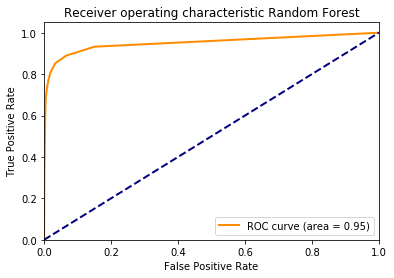

In [42]:
plot_roc(y_test, X_test, model=clf, model_name='Random Forest')

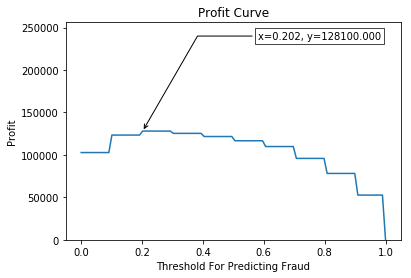

In [43]:
plot_profit_curve(scoring, profit_matrix, num_points=100)

### Evaluating Grid Search RF

In [44]:
rf_grid = RandomForestClassifier(random_state=0)

In [45]:
param_grid = { 
               "n_estimators" : [500]
            }
param_grid

{'n_estimators': [500]}

In [46]:
CV_rfc = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv= 5, scoring='recall')
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

{'n_estimators': 500}


In [47]:
scoring_grid = evalu.Scores(model=CV_rfc, X_test=X_test, y_test=y_test)
scoring_grid.scores()

Accuracy: 0.9704323570432357
Precision 0.8873239436619719
Recall 0.7730061349693251
F1 0.8262295081967213


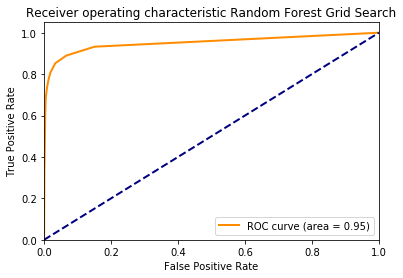

In [48]:
plot_roc(y_test, X_test, model=CV_rfc, model_name='Random Forest Grid Search')

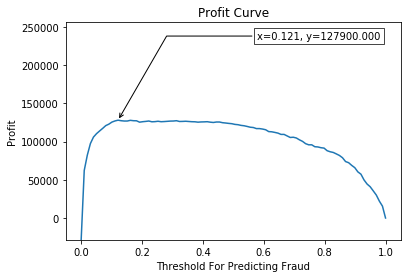

In [49]:
plot_profit_curve(scoring_grid, profit_matrix, num_points=100)